
## Logistic Regression

Logistic regression is a natural bridge to connect regression and classification.
- Logistic regression is the most common binary classification algorithm.
- Because it is a regression model, logistic regression will predict continuous values.
    - Logistic regression will predict continuous probabilities between 0 and 1.
    - Example: What is the probability that someone shows up to vote?
- However, logistic regression almost always operates as a classification model.
    - Logistic regression will use these continuous predictions to classify something as 0 or 1.
    - Example: Based on the predicted probability, do we predict that someone votes?

In this project, we'll explore the binary outcome case with two classes, but logistic regression can be generalized to multiple classes.

**Some examples of when logistic regression could be used:**
- Will a user will purchase a product, given characteristics like income, age, and number of family members?
- Does this patient have a specific disease based on their symptoms?
- Will a person default on their loan?
- Is the iris flower in front of me an "_Iris versicolor_?"
- Given one's GPA and the prestige of a college, will a student be admitted to a specific graduate program?

And many more.

 

## Predicting graguate school admission based on GPA
In this project,  we'll be applying logistic regression to solve the following problem: "Given one's GPA and the prestige of a college, will a student be admitted to a specific graduate program?"

In [7]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import LogisticRegression and LinearRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression

In [8]:
# Read in the data.
admissions = pd.read_csv('../datasets/admissions.csv')

In [9]:
# Check first five rows.
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


The four columns are:
- `admit`: A binary 0/1 variable indicating whether or not a student was admitted, where 1 means admitted and 0 means not admitted.
- `gre`: The student's [GRE (Graduate Record Exam)](https://en.wikipedia.org/wiki/Graduate_Record_Examinations) score.
- `gpa`: The student's GPA.
- `prestige`: A 1-4 rating for the college's "prestige."

In [10]:
# Check for missing values.
admissions.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [11]:
# Drop every row that has an NA.
admissions.dropna(inplace=True)

<details><summary>What assumption are we making when we drop rows that have at least one NA in it?</summary>
    
- We assume that what we drop looks like what we have observed. That is, there's nothing special about the rows we happened to drop.
- We might say that what we dropped is a random sample of our whole data.
- It's not important to know this now, but the formal term is that our data is missing completely at random.
</details>

<details><summary>Suppose I want to check if a value of 1 for prestige means "most prestigious" or "least prestigious." How might I find this out?</summary>
    
- Check a data dictionary to see if the answer exists.
- If a data dictionary doesn't exist, compare prestige to admit. You could use [groupby](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.groupby.html) to make a table or you could use a plot.
</details>

In [12]:
# Compare prestige to admit using groupby.
# Find the mean prestige score of people who were and weren't admitted.

admissions.groupby(by='admit')['prestige'].mean()

admit
0    2.645756
1    2.150794
Name: prestige, dtype: float64

### Artificially increase the signal in the data.

The signal for detecting admission in the college data is fairly weak — too weak for the purposes of our demonstration. (There are lots of factors to predicting admission other than GPA, test score, and prestige.)

**Obviously you would never do this to your real data**... but in order to make the relationship between our predictors and whether or not someone is admitted a lot clearer, we are making 10 copies of the data set and adding an artificial signal for detecting `admit` to the `gpa` column.

In [14]:
# Grab all rows where prestige = 1.
admit = admissions[admissions['prestige'] == 1]

# Concatenate ten copies of admit.
admit = pd.concat([admit] * 10, axis=0)

# Set a random seed.
np.random.seed(42)

# Add random noise to inflate GPA for people who were admitted.
# Subtract random noise to deflate GPA for people who were not admitted.
# Again: DO NOT DO THIS IN GENERAL.
admit.loc[admit['admit'] == 1, 'gpa'] += np.random.random(size=admit[admit.admit == 1].shape[0])
admit.loc[admit['admit'] == 0, 'gpa'] -= np.random.random(size=admit[admit.admit == 0].shape[0])

<a id='logistic-viz'></a>

## Fitting and making predictions with the logistic regression model.

---

In [ ]:
# Step 1: Instantiate our model.
logreg = LogisticRegression()

# Step 2: Fit our model.
logreg.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

In [14]:
# Step 3 (part 1): Generate predicted values.
print(f'Logreg predicted values: {logreg.predict(X_train.head())}')

Logreg predicted values: [0 1 1 1 1]


In [15]:
# Step 3 (part 2): Generate predicted probabilities.
print(f'Logreg predicted probabilities: {logreg.predict_proba(X_train.head())}')

Logreg predicted probabilities: [[0.79593129 0.20406871]
 [0.25557914 0.74442086]
 [0.19558406 0.80441594]
 [0.25407476 0.74592524]
 [0.28957147 0.71042853]]


<a id='log-odds'></a>

### Using the log-odds —the natural logarithm of the odds.

The combination of converting the "probability of success" to "odds of success," then taking the logarithm of that is called the **logit link function**.

### $$\text{logit}\big(P(Y=1)\big) = \log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

We've bent our line how we want... but how do we interpret our coefficients?

---
<a id='odds-ratios'></a>
### Odds

Probabilities and odds represent the same thing in different ways. The odds for probability **p** is defined as:

### $$\text{odds}(p) = \frac{p}{1-p}$$

The odds of a probability is a measure of how many times as likely an event is to happen than it is to not happen.

**Example**: Suppose I'm looking at the probability and odds of a specific horse, "Secretariat," winning a race.

- When **`p = 0.5`**: **`odds = 1`**
    - The horse Secretariat is as likely to win as it is to lose.
- When **`p = 0.75`**: **`odds = 3`**
    - The horse Secretariat is three times as likely to win as it is to lose.
- When **`p = 0.40`**: **`odds = 0.666..`**
   - The horse Secretariat is two-thirds as likely to win as it is to lose.

In [9]:
prestige = admissions.groupby("prestige").mean()
prestige

,admit,gre,gpa
prestige,,,
1.0,0.540984,611.803279,3.453115
2.0,0.353333,596.621622,3.364027
3.0,0.231405,574.876033,3.432893
4.0,0.179104,570.149254,3.318358


In [16]:
# Define a function called odds to calculate the odds of success.
def odds(p):
    return (p / (1 - p))

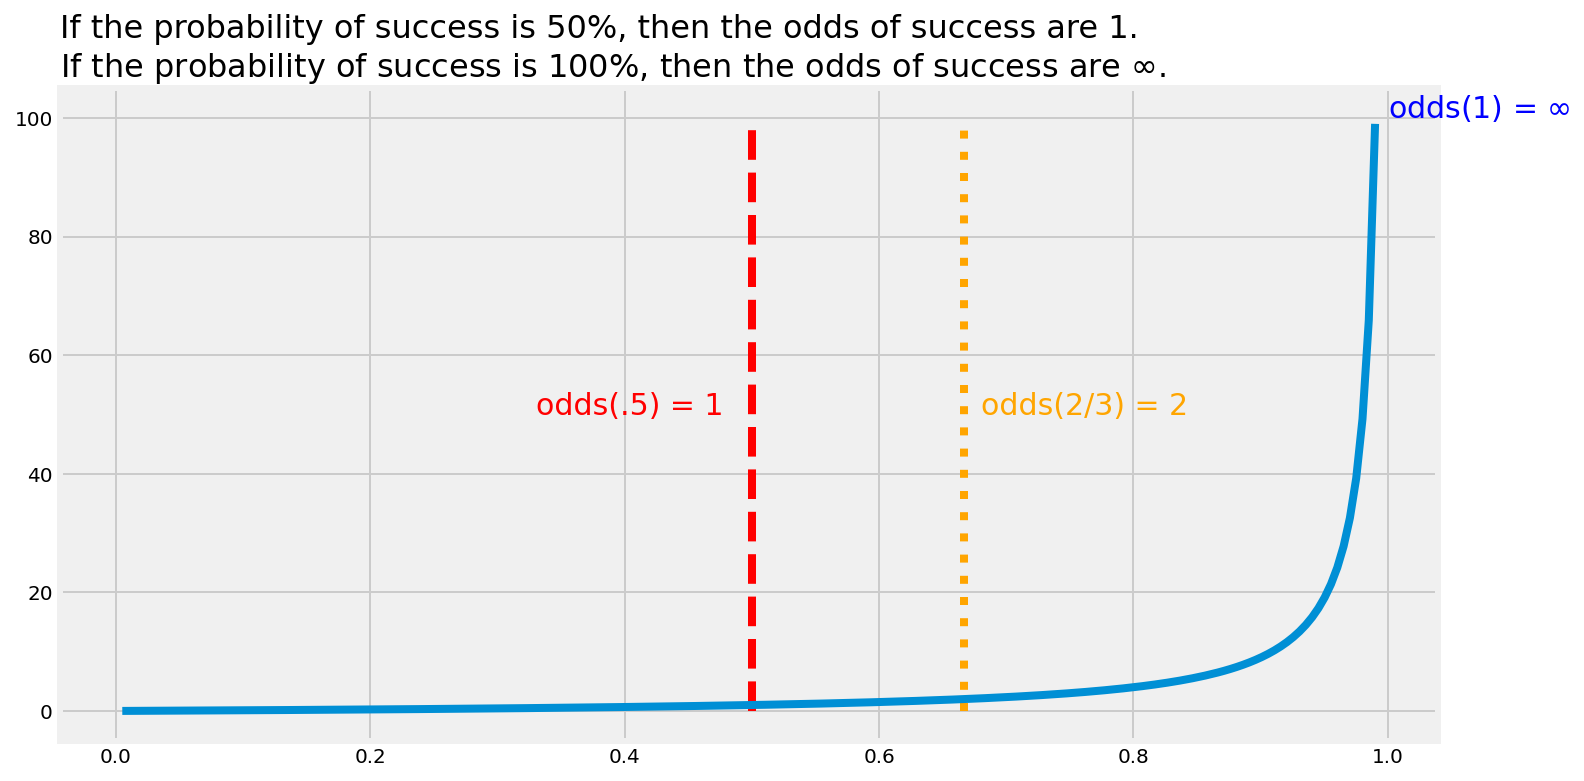

In [17]:
# Plot a range of probabilities.
probabilities = np.linspace(0.005, .99, 200)

# Generate list of odds.
odds_list = [odds(proba) for proba in probabilities]

# Create figure.
plt.figure(figsize=(11,6))

# Plot blue line for odds as probability goes from 0.5% to 99%.
plt.plot(probabilities,
         odds_list)

# Plot red dashed line to visualize odds when probability is 50%.
plt.vlines(.5, 0, 100, linestyles="dashed", color='red')
plt.text(.33, 50, "odds(.5) = 1", fontsize=15, color = 'red')

# Plot orange dotted line to visualize odds when probability is 66.67%.
plt.vlines(.6667, 0, 100, linestyles="dotted", color='orange')
plt.text(.68, 50, "odds(2/3) = 2", fontsize=15, color='orange')

# Annotate blue line when probability is 100%.
plt.text(1, 100, "odds(1) = $\infty$", fontsize=15, color='blue')

# Make title.
plt.title("If the probability of success is 50%, then the odds of success are 1.\nIf the probability of success is 100%, then the odds of success are $\infty$.",
          ha = 'left',
          position = (0,1),
          fontsize=16);

## Interpreting a one-unit change in $X_i$.

$$\log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

Given this model, a one-unit change in $X_i$ implies a $\beta_i$ unit change in the log odds of success.

**This is annoying**.

We often convert log-odds back to "regular odds" when interpreting our coefficient... our mind understands odds better than the log of odds.

So, let's get rid of the log on the left-hand side. Mathematically, we do this by "exponentiating" each side.

$$
\begin{eqnarray*}
\log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg) &=& \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p \\
\Rightarrow e^{\Bigg\{\log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg)\Bigg\}} &=& e^{\Bigg\{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg\}} \\
\Rightarrow \exp{\Bigg\{\log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg)\Bigg\}} &=& \exp{\Bigg\{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg\}} \\
\Rightarrow \frac{P(Y=1)}{1-P(Y=1)} &=& \exp{\Bigg\{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg\}} \\
\end{eqnarray*}
$$

**Interpretation**: A one-unit change in $X_i$ means that success is $e^{\beta_i}$ times as likely.

<details><summary> I want to interpret the coefficient $\hat{\beta}_1$ for my logistic regression model. How would I interpret this coefficient?</summary>
    
- Our model is that $ln\bigg(\frac{P(admit=1)}{1-P(admit=1)}\bigg) = \beta_0 + \beta_1\text{GPA}$.
- As GPA increases by 1, the log-odds of someone being admitted increases by 2.20.
- As GPA increases by 1, someone is $e^{2.20}$ times as likely to be admitted.
- As GPA increases by 1, someone is about 9.04 times as likely to be admitted to grad school.
</details>

> Hint: Use the [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) function.

In [16]:
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Coefficient: [[2.20134368]]


In [17]:
# Use np.exp() to exponentiate the coefficient.
np.exp(logreg.coef_)

array([[9.03714842]])

## Beyond binary classification problems.

Note: In this project, we looked at a binary classification problem: was somebody admitted, or not? Many of our classification problems will be binary. Even if the problem isn't binary, we can always force it to be binary. (i.e. Did the stock price increase or decrease?). However, some of our classification problems won't be binary. 

<a id='conclusion'></a>

## Conclusion

---

The goal of logistic regression is to find the best-fitting model to describe the relationship between a binary outcome and a set of independent variables.

Logistic regression generates the coefficients of a formula to predict a logit transformation of the probability that the characteristic of interest is present.

**Benefits of logistic regression include:**
- It's a classification algorithm that shares similar properties to linear regression.
- It's efficient.
- It is by far the most common classification algorithm.
- The coefficients in a logistic regression model are interpretable (albeit somewhat complex); they represent the change in log-odds caused by the input variables.

# END !